# Hypervolume Analysis

## 1. Read data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib
matplotlib.use
import matplotlib.pyplot as plt

# load data
df = pd.read_csv('WindTurbineDesignHypervolumeMedianRun.csv')
dfmax = df.iloc[[-1]]
dfmaxt = dfmax.transpose()
dfmaxt.columns = ['median']
dfmaxt = dfmaxt.drop('FE', axis=0)

dfbest = pd.read_csv('WindTurbineDesignHypervolumeBestRun.csv')
dfmaxbest = dfbest.iloc[[-1]]
dfmaxbest = dfmaxbest.transpose()
dfmaxbest.columns = ['max']
dfmaxbest = dfmaxbest.drop('FE', axis=0)


## 2. Configure plot function

In [2]:

labels={
    "NSGAIII":   "(1st) NSGA-III",
    "CHHCO":     "(2nd) HH-CO",
    "ThetaDEA":  "(3rd) ThetaDEA",
    "SPEA2":     "(4th) SPEA2",
    "SPEA2SDE":  "(5th) SPEA2SDE",
    "NSGAII":    "(6th) NSGA-II",
    "CMOMBI2":   "(7th) MOMBI2",
    "CMOEAD":    "(8th) MOEA/D",
    "HypE":      "(9th) HypE",
    "CMOEADD":   "(10th) MOEA/DD",
}


def plot_hypervolume(algs):
    f = plt.figure(figsize=(10, 5))
#     plt.subplots_adjust(right=0.8)
    ax = f.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)


    colors={
        "NSGAIII": "tab:blue",
        "ThetaDEA": "tab:orange",
        "SPEA2": "tab:green",
        "SPEA2SDE": "tab:red",
        "NSGAII": "tab:purple",
        "CMOEAD": "tab:brown",
        "CMOMBI2": "tab:pink",
        "HypE": "tab:cyan",
        "CMOEADD": "tab:olive",
        "CHHCO": "k",
    }

    styles={
        "NSGAIII": "-",
        "SPEA2SDE": "-",
        "SPEA2": "-",
        "CMOMBI2": "-",
        "ThetaDEA": "-",
        "CMOEAD": "-",
        "NSGAII": "-",
        "HypE": "-",
        "CHHCO": "--",
    }
    
    offset={
        "NSGAIII":   0.0,
        "CHHCO":     1.0,
        "ThetaDEA":  2.0,
        "SPEA2":     3.0,
        "SPEA2SDE":  4.0,
        "NSGAII":    5.0,
        "CMOMBI2":   6.0,
        "CMOEAD":    7.0,
        "HypE":      8.0,
        "CMOEADD":   9.0,
    }

    i=0
    for alg in algs:
        df.plot(x="FE", y=alg, ax=f.gca(), legend=False, style=styles[alg], color=colors[alg], label=labels[alg])
#         plt.text(10000, 5-offset[alg]*0.3, labels[alg], color=colors[alg])
        i+=1
    plt.xlabel("Fitness Evaluations")
    plt.ylabel("Hypervolume")
    ax.grid(True, ls='--', which='both')
    # ax.set_yticks(np.arange(0, 11, step=2))
    ax.tick_params(axis='both', which='both', # labelsize=14,
               bottom=False, top=False, labelbottom=True,
               left=False, right=False, labelleft=True)
    ax.set_xlim(-0.1, 9870)
    axhandles, axlabels = ax.get_legend_handles_labels()
    ax.legend(axhandles[::-1], axlabels[::-1], title='Ranking', loc='lower right')# , bbox_to_anchor=(1, 1.0))
    plt.show()
    return f


## 3. Plot HV of all MOEAs and HH-CO

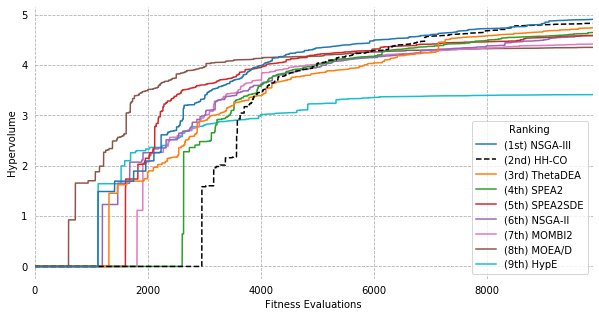

In [3]:
algs=["HypE","CMOEAD","CMOMBI2","NSGAII","SPEA2SDE","SPEA2","ThetaDEA","CHHCO","NSGAIII"]
fig = plot_hypervolume(algs)
fig.savefig("hypervolume.pdf")

## 4. BoxPlot for final hypervolume

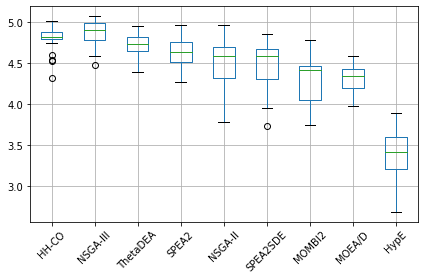

In [4]:
df = pd.read_csv('21RawHypervolumes.csv')
df.drop(df.tail(1).index,inplace=True) # drop best value row

df = df[['CHHCO', 'NSGAIII', 'ThetaDEA', 'SPEA2', 'NSGAII', 'SPEA2SDE', 'MOMBI2', 'MOEAD', 'HypE']]

f = plt.figure()
plt.tight_layout()
ax = f.gca()
df.boxplot(ax=ax)
ax.set_xticklabels(['HH-CO', 'NSGA-III', 'ThetaDEA', 'SPEA2', 'NSGA-II', 'SPEA2SDE', 'MOMBI2', 'MOEA/D', 'HypE'], rotation=45)
plt.tight_layout()
plt.savefig('hvBoxplot.pdf')